<a href="https://colab.research.google.com/github/dmb0018/CS6682_Homework5/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

David Bryant



---


CS 6682 - Machine Learning

---


Homework 5



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
import sys

In [ ]:
# Upload two csv files
path_weather = "/content/drive/My Drive/ML_Homework/weatherAUS.csv"
df_weather = pd.read_csv(path_weather)

# Find number of rows and columns for the data
num_rows = df_weather.shape[0]
num_columns = df_weather.shape[1]

#Make display show all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Set printing options to only show 10 lines
np.set_printoptions(threshold=10)

# Provides number of empty data slots in each column of data frame
isNullColumns = df_weather.isnull().sum()/num_rows

# Create some constants for max number of columns to delte and min threshold for having missing data
possible_columns_to_delete = 10
minimum_threshold = 0.3  # If 30 percent of data is missing then assign column to be deleted
count = 0

# Create array to hold the column index values that are going to be deleted
columns_to_delete = [-1]*possible_columns_to_delete

# For loop to find columns that don't meet minimum threshold of nonmissing data
for x in range(num_columns):
  if isNullColumns[x] > minimum_threshold:
    columns_to_delete[count] = x
    count = count +1

# Needed to adjust the columns index once columns are deleted
current_subtract = 0

# For loop to remove columns
for x in range(possible_columns_to_delete):
  if columns_to_delete[x] > -1:
    df_weather.drop(df_weather.columns[[columns_to_delete[x]-current_subtract]], axis=1, inplace=True)
    current_subtract = current_subtract +1

obj_weather = df_weather.select_dtypes(include=['object']).copy()

# Replace the missing values in each column with the previous volumn in the column
obj_weather_filled = obj_weather.fillna(method = 'pad')

# For the float columns, replace the missing values with the mean of that column
df_weather = df_weather.fillna(df_weather.mean())


# Take Object data frame and make them categories and use categories for each column
obj_weather_filled = obj_weather_filled.astype('category')
obj_weather_filled['Location'] = obj_weather_filled['Location'].cat.codes
obj_weather_filled['WindGustDir'] = obj_weather_filled['WindGustDir'].cat.codes
obj_weather_filled['WindDir9am'] = obj_weather_filled['WindDir9am'].cat.codes
obj_weather_filled['WindDir3pm'] = obj_weather_filled['WindDir3pm'].cat.codes
obj_weather_filled['RainToday'] = obj_weather_filled['RainToday'].cat.codes
obj_weather_filled['RainTomorrow'] = obj_weather_filled['RainTomorrow'].cat.codes

#Put Category columns back into main data frame
df_weather['Location'] = obj_weather_filled['Location']
df_weather['WindGustDir'] = obj_weather_filled['WindGustDir']
df_weather['WindDir9am'] = obj_weather_filled['WindDir9am']
df_weather['WindDir3pm'] = obj_weather_filled['WindDir3pm']
df_weather['RainToday'] = obj_weather_filled['RainToday']
df_weather['RainTomorrow'] = obj_weather_filled['RainTomorrow']

# Find what correlates most with Rain Today
correlations = df_weather.corr(numeric_only = True)
correlations_sorted = correlations.sort_values(['RainToday'], ascending=False)
pd.options.display.max_rows = None
print(correlations_sorted['RainToday'])

RainToday        1.000000
Rainfall         0.495050
Humidity3pm      0.369752
Humidity9am      0.347865
RainTomorrow     0.328328
WindDir9am       0.160779
WindGustSpeed    0.146034
WindGustDir      0.128814
WindDir3pm       0.122118
WindSpeed9am     0.100296
WindSpeed3pm     0.077143
MinTemp          0.052448
Location         0.000792
Pressure3pm     -0.097494
Temp9am         -0.097718
Pressure9am     -0.175766
MaxTemp         -0.228588
Temp3pm         -0.232221
Name: RainToday, dtype: float64


<ipython-input-3-0ab3e9724c7c>:48: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_weather = df_weather.fillna(df_weather.mean())


<Axes: xlabel='RainToday', ylabel='count'>

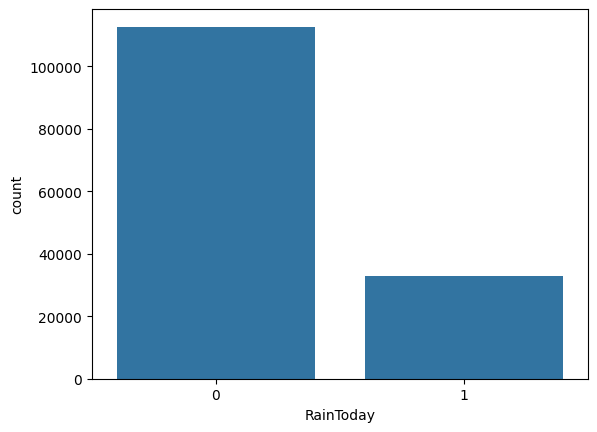

In [ ]:
# Confirming that Rain Today is binary as expected
sb.countplot(x='RainToday', data = df_weather)

In [ ]:
# Item attempting to predict is Rain Today
y = df_weather['RainToday']

# Did not choose Rainfall even though it was better correlated as it seemed to not be independent - If rain happened, it directly lead to rainfall being a higher number than 0

important_data = df_weather.filter(['Humidity3pm','Humidity9am','RainTomorrow'],axis =1)
print(important_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Humidity3pm   145460 non-null  float64
 1   Humidity9am   145460 non-null  float64
 2   RainTomorrow  145460 non-null  int8   
dtypes: float64(2), int8(1)
memory usage: 2.4 MB
None


In [9]:
# Create object for standard scaler
scaler = StandardScaler()
X = important_data

# Create training and testing data
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.1, random_state = 26)

#fit the training data and scale the train and test data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# Perform logistic regression
LogReg = LogisticRegression()
model = LogReg.fit(X_train_scaled,y_train)

# Train on 90 percent of the data and test on 10% of the data
print("The Logistic Regression score using a train of 90% and test of 10% is: ",model.score(X_train_scaled,y_train))
y_pred_scaled = model.predict(X_test_scaled)
print(metrics.classification_report(y_test,y_pred_scaled))


The Logistic Regression score using a train of 90% and test of 10% is:  0.8087828650870037
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11305
           1       0.64      0.34      0.44      3241

    accuracy                           0.81     14546
   macro avg       0.74      0.64      0.66     14546
weighted avg       0.79      0.81      0.79     14546



In [10]:
# Wanted to do one comparison with Only rain today and date removed from the data frame and see which was better
X2 = df_weather.drop(columns = 'Date')
X2 = X2.drop(columns = 'RainToday')

# Create training and testing data
X2_train, X2_test, y2_train, y2_test  = train_test_split(X2,y,test_size = 0.1, random_state = 26)

#fit the training data and scale the train and test data
scaler.fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)
X2_train_scaled = pd.DataFrame(X2_train_scaled, columns = X2_train.columns)
X2_test_scaled = pd.DataFrame(X2_test_scaled, columns = X2_test.columns)

# Perform logistic regression
LogReg = LogisticRegression()
model = LogReg.fit(X2_train_scaled,y_train)

# Train on 90 percent of the data and test on 10% of the data
print("The Logistic Regression score using a train of 90% and test of 10% is: ",model.score(X2_train_scaled,y_train))
y_pred_scaled2 = model.predict(X2_test_scaled)
print(metrics.classification_report(y2_test,y_pred_scaled2))

The Logistic Regression score using a train of 90% and test of 10% is:  0.9638464946453397
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11305
           1       0.93      0.92      0.92      3241

    accuracy                           0.96     14546
   macro avg       0.95      0.95      0.95     14546
weighted avg       0.96      0.96      0.96     14546



In [ ]:
X3 = df_weather.drop(columns = 'Date')
X3 = X3.drop(columns = 'RainToday')

# Create training and testing data
X3_train, X3_test, y3_train, y3_test  = train_test_split(X3,y,test_size = 0.1, random_state = 26)

#fit the training data and scale the train and test data
scaler.fit(X3_train)
X3_train_scaled = scaler.transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)
X3_train_scaled = pd.DataFrame(X3_train_scaled, columns = X3_train.columns)
X3_test_scaled = pd.DataFrame(X3_test_scaled, columns = X3_test.columns)

# Perform linear model, polynomial model, and radial basis function model
svm_model_1 = svm.LinearSVC(C=1)
svm_model_2 = svm.SVC(kernel='poly',degree = 2)
svm_model_3 = svm.SVC(kernel='rbf',C=1, gamma =1)

# Fit the models to the data
svm_model_1.fit(X3_train_scaled,y3_train)
svm_model_2.fit(X3_train_scaled,y3_train)
svm_model_3.fit(X3_train_scaled,y3_train)

# Test the predicition capabilities of the model
y_pred3 = svm_model_1.predict(X3_test_scaled)
y_pred4 = svm_model_2.predict(X3_test_scaled)
y_pred5 = svm_model_3.predict(X3_test_scaled)

# Print the accuracy results of the prediction
print("The SVM score using a linear model and a training percent of 90% and a test of 10% is: ", metrics.accuracy_score(y3_test, y_pred3))
print("The SVM score using a polynomial model with a degree of 2 and a training percent of 90% and a test of 10% is: ", metrics.accuracy_score(y3_test, y_pred4))
print("The SVM score using a radial basis function model and a training percent of 90% and a test of 10% is: ", metrics.accuracy_score(y3_test, y_pred5))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The SVM score using a linear model and a training percent of 90% and a test of 10% is:  0.9661075209679637
The SVM score using a polynomial model with a degree of 2 and a training percent of 90% and a test of 10% is:  0.8778358311563317
The SVM score using a radial basis function model and a training percent of 90% and a test of 10% is:  0.8653925477794583


In [11]:
# Print classification reports for the three different SVM model
print("Classification report for linear model:")
print(metrics.classification_report(y3_test,y_pred3))
print("\nClassification report for polynomial model:")
print(metrics.classification_report(y3_test,y_pred4))
print("\nClassification report for radial basis function model:")
print(metrics.classification_report(y3_test,y_pred5))

Classification report for linear model:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11305
           1       0.92      0.92      0.92      3241

    accuracy                           0.97     14546
   macro avg       0.95      0.95      0.95     14546
weighted avg       0.97      0.97      0.97     14546


Classification report for polynomial model:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     11305
           1       1.00      0.45      0.62      3241

    accuracy                           0.88     14546
   macro avg       0.93      0.73      0.77     14546
weighted avg       0.89      0.88      0.86     14546


Classification report for radial basis function model:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     11305
           1       0.94      0.42      0.58      3241

    accuracy                           0.